# Stronger, Lighter Cars


# **1. Load the dataset**

In [1]:
import pandas as pd
# 1. Load the dataset from a valid GitHub source
# This dataset contains 312 steel alloys with their chemical composition and strength
url = "https://raw.githubusercontent.com/batiukmaks/Steel-Strength-Prediction/master/steel_strength.csv"

data = pd.read_csv(url)


# **2. Inspect the "Recipe" (First 5 rows)**

>TODO: Show the head of the dataframe
data.head()

In [2]:
data.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [ ]:
data.columns

Index(['formula', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w',
       'al', 'ti', 'yield strength', 'tensile strength', 'elongation'],
      dtype='object')

In [ ]:
data.describe()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,303.000000
mean,0.096442,0.146250,0.221218,8.043830,8.184006,2.766090,0.183750,0.005545,0.035449,7.008782,0.161282,0.239135,0.310897,1420.998397,1641.653205,14.007261
std,0.109008,0.397102,0.580796,5.426169,6.337055,1.832908,0.452462,0.018331,0.161537,6.254431,0.920211,0.340110,0.556593,301.894169,346.475179,5.095974
min,0.000000,0.010000,0.010000,0.010000,0.010000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,1005.900000,1019.000000,2.000000
25%,0.010000,0.010000,0.010000,3.100000,0.960000,1.500000,0.010000,0.000000,0.010000,0.010000,0.000000,0.030000,0.000000,1219.475000,1338.125000,10.800000
50%,0.030000,0.010000,0.010000,9.050000,8.500000,2.210000,0.010000,0.000000,0.010000,7.085000,0.000000,0.050000,0.030000,1344.200000,1666.300000,14.800000
75%,0.182500,0.080000,0.110000,12.520000,12.117500,4.090000,0.127500,0.000000,0.010000,13.480000,0.000000,0.300000,0.232500,1576.075000,1899.950000,17.300000
max,0.430000,3.000000,4.750000,17.500000,21.000000,9.670000,4.320000,0.150000,2.500000,20.100000,9.180000,1.800000,2.500000,2510.300000,2570.000000,35.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [ ]:
# 1. Define the Target (y)
y = data['yield strength']

# 2. Define the Features (X) - SELECTING ONLY METALS
# We create a list of only the metal columns
metal_features = ['mn','si','cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Select only those columns from the dataframe
X = data[metal_features]

print("Selected only metal features:")
print(X.head())

Selected only metal features:
     mn    si     cr     ni    mo     v     n    nb     co     w    al    ti
0  0.05  0.05   0.01  19.70  2.95  0.01  0.00  0.01  15.00  0.00  0.15  1.55
1  0.01  0.01  13.44   0.01  3.01  0.46  0.04  0.01  19.46  2.35  0.04  0.00
2  0.01  0.01   8.67  13.45  0.82  0.01  0.00  0.01  13.90  0.00  0.39  0.57
3  0.05  0.05   0.01  17.70  3.95  0.01  0.00  0.01  15.00  0.00  0.13  1.47
4  0.05  0.05   0.01  19.40  1.45  0.01  0.00  0.01  14.90  0.00  0.13  1.55


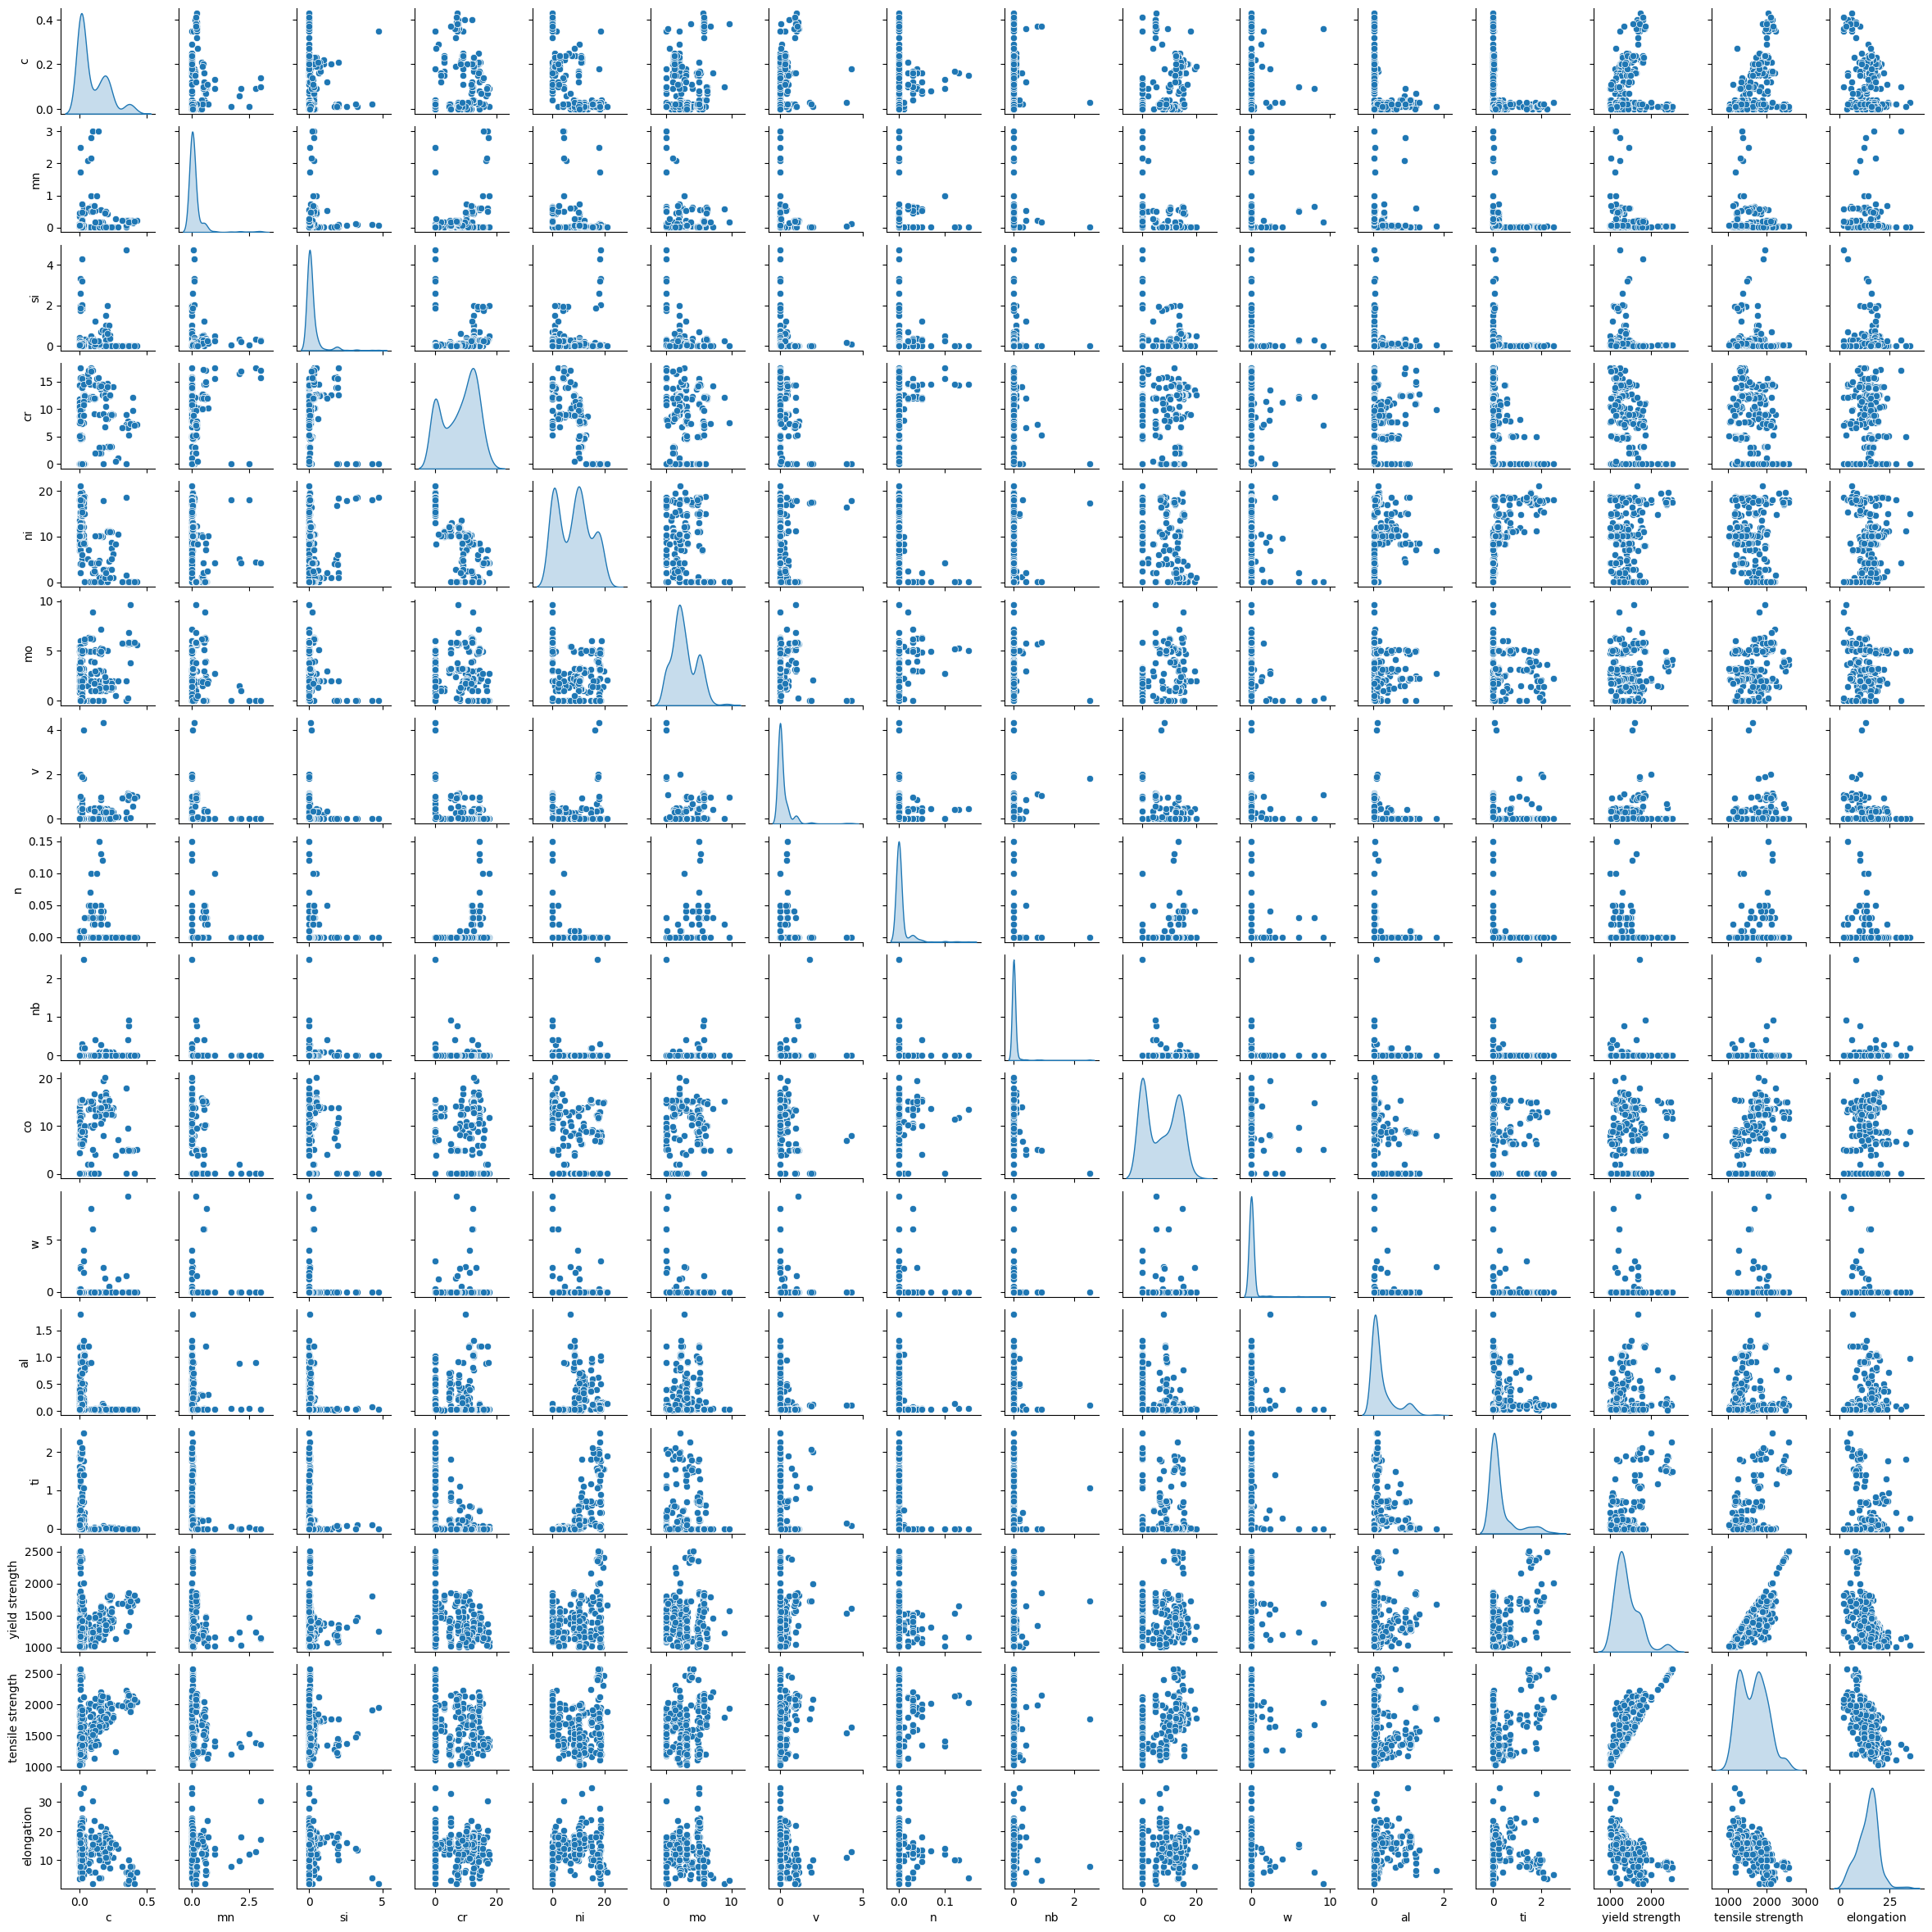

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select a few key columns to focus on
# If we plot all 16 columns, the image will be too small to read!
#cols_to_plot = ['c', 'mn', 'si', 'yield strength']

# 2. Create the Pair Plot
# "diag_kind='kde'" draws a smooth curve histogram on the diagonal
# Plot ALL columns in the dataframe
# Note: This might take 30-60 seconds to render because it's drawing 256 plots!
sns.pairplot(data, diag_kind='kde', height=1.5) # height=1.5 makes individual plots smaller
plt.show()

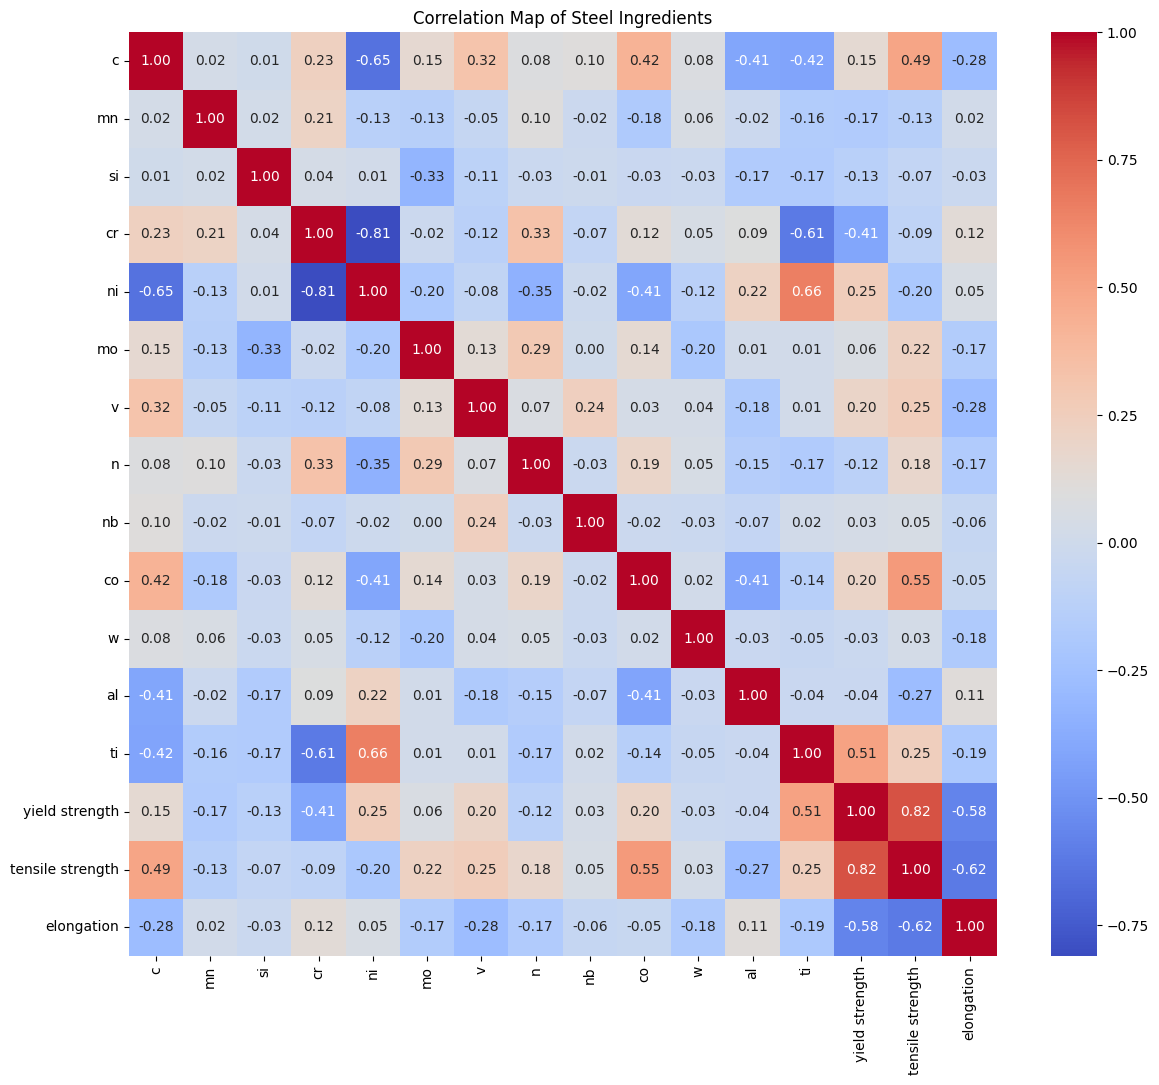

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

# FIX: Add 'numeric_only=True' so it ignores the text columns
correlation_matrix = data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map of Steel Ingredients")
plt.show()

We want to predict 'Yield Strength' (y) using the chemical elements (X)

# 1. Define the Target (y)
# 2. Define the Features (X)
We will drop the target column to keep only the ingredients


In [ ]:
D = data.drop('yield strength', axis=1)
print("We have", D.shape[0], "steel samples.")
print("We are using", D.shape[1], "ingredients to predict strength.")

We have 312 steel samples.
We are using 16 ingredients to predict strength.


Part B: X and y Split
Crucial Concept: Separating the "Recipe" from the "Result".

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Split data into "Study Guide" (Train) and "Final Exam" (Test)
# We replace ____ with 0.2 (which means 20% of data is for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the AI Brain
model = RandomForestRegressor()

# 3. Train the model (Fit)
print("Training the ML model...")
# We replace ____ with X_train and y_train
model.fit(X_train, y_train)

print("Training Complete!")

Training the ML model...
Training Complete!


In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    max_error,
    explained_variance_score
)
import numpy as np

# 1. Get predictions
predictions = model.predict(X_test)

# 2. Calculate All Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
med_ae = median_absolute_error(y_test, predictions)
max_err = max_error(y_test, predictions)

# 3. Print the Report Card
print("=== MODEL PERFORMANCE REPORT ===")
print(f"1. R2 Score (Accuracy):          {r2:.4f}  (Closer to 1.0 is better)")
print(f"2. MAE (Average Error):          {mae:.2f} MPa (On average, we are off by this much)")
print(f"3. RMSE (Penalizes Big Errors):  {rmse:.2f} MPa (Higher than MAE means we have some big misses)")
print(f"4. Median Error (Typical Error): {med_ae:.2f} MPa (Ignores outliers - this is the 'normal' mistake)")
print(f"5. Max Error (Worst Case):       {max_err:.2f} MPa (The biggest mistake we made on a single alloy)")
print("================================")

=== MODEL PERFORMANCE REPORT ===
1. R2 Score (Accuracy):          0.7893  (Closer to 1.0 is better)
2. MAE (Average Error):          82.33 MPa (On average, we are off by this much)
3. RMSE (Penalizes Big Errors):  120.49 MPa (Higher than MAE means we have some big misses)
4. Median Error (Typical Error): 54.84 MPa (Ignores outliers - this is the 'normal' mistake)
5. Max Error (Worst Case):       432.07 MPa (The biggest mistake we made on a single alloy)


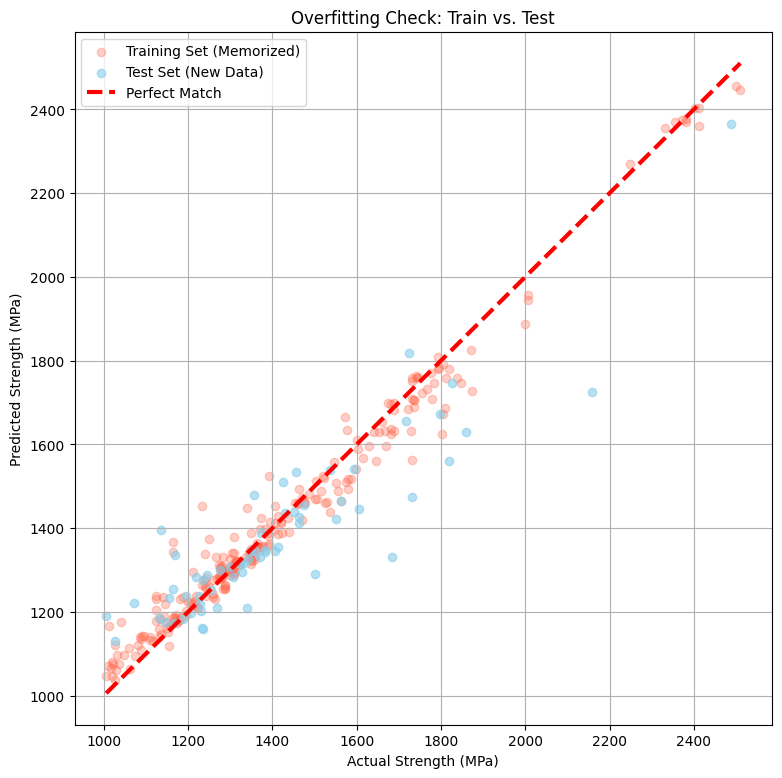

In [ ]:
import matplotlib.pyplot as plt

# 1. Get predictions for BOTH sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

plt.figure(figsize=(9, 9))

# 2. Plot Training Data (Blue)
# We use a lower 'alpha' (transparency) because there are usually many more training points
plt.scatter(y_train, train_preds, color='tomato', alpha=0.3, label='Training Set (Memorized)')

# 3. Plot Test Data (Green)
# These are the "New" alloys the model has never seen
plt.scatter(y_test, test_preds, color='skyblue', alpha=0.6, label='Test Set (New Data)')

# 4. Draw the "Perfect Prediction" Line
min_val = min(y.min(), train_preds.min()) # Find the lowest value in the whole dataset
max_val = max(y.max(), train_preds.max()) # Find the highest value
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Perfect Match')

plt.title("Overfitting Check: Train vs. Test")
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# 1. Initialize the 3 Candidates
models = {
    "1. Linear Regression (Simple)": LinearRegression(),
    "2. Random Forest (Voting)": RandomForestRegressor(random_state=42),
    "3. Gradient Boosting (Correction)": GradientBoostingRegressor(random_state=42)
}

print("=== MODEL SHOOTOUT RESULTS ===")
print(f"{'Model Name':<35} | {'R2 Score':<10} | {'MAE (MPa)'}")
print("-" * 65)

# 2. Loop through, train, and evaluate each one
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Score
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print(f"{name:<35} | {r2:.4f}     | {mae:.2f}")

print("-" * 65)

=== MODEL SHOOTOUT RESULTS ===
Model Name                          | R2 Score   | MAE (MPa)
-----------------------------------------------------------------
1. Linear Regression (Simple)       | -0.0691     | 165.07
2. Random Forest (Voting)           | 0.7958     | 82.34
3. Gradient Boosting (Correction)   | 0.8280     | 80.64
-----------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# 1. Setup the 6 Contenders
models = {
    "1. Linear Regression": LinearRegression(),
    "2. K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsRegressor()),
    "3. Random Forest": RandomForestRegressor(random_state=42),
    "4. Gradient Boosting (sklearn)": GradientBoostingRegressor(random_state=42),
    "5. Neural Network": make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)),
    "6. XGBoost": XGBRegressor(random_state=42)
}

# 2. Create a Scoreboard
results = []

print("Training 6 models... this might take a minute.\n")

# 3. The Training Loop
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Score
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    # Save results
    results.append({"Model": name, "Accuracy (R2)": r2, "MAE (MPa)": mae})

# 4. Display the Final Leaderboard
leaderboard = pd.DataFrame(results).sort_values(by="Accuracy (R2)", ascending=False)
print(leaderboard.to_string(index=False))

Training 6 models... this might take a minute.



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                         Model  Accuracy (R2)  MAE (MPa)
4. Gradient Boosting (sklearn)       0.828035  80.644705
              3. Random Forest       0.795835  82.343079
                    6. XGBoost       0.764105  83.762624
        2. K-Nearest Neighbors       0.725508  86.351746
             5. Neural Network       0.182602 151.711170
          1. Linear Regression      -0.069070 165.065023


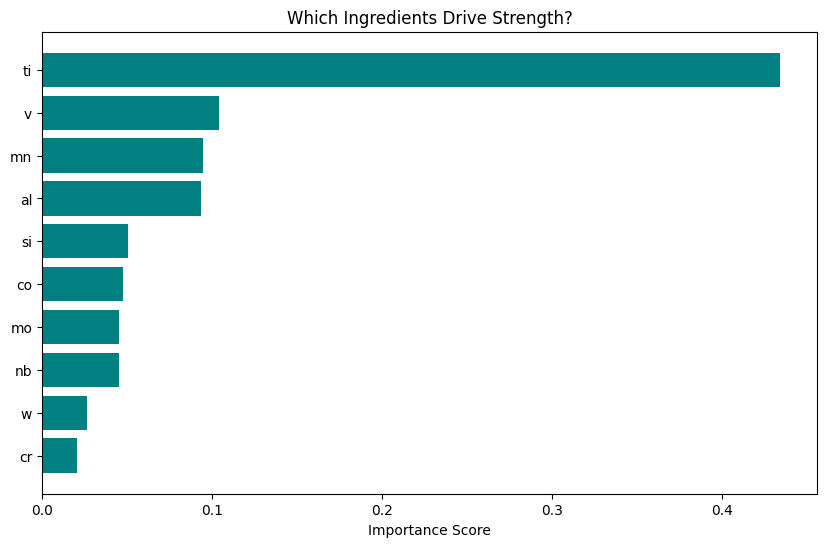

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Get the "Importance" numbers from the model
importances = model.feature_importances_

# 2. Create a DataFrame to display them nicely
feature_importance_df = pd.DataFrame({
    'Ingredient': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Plot the Top 10 Ingredients
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Ingredient'][:10], feature_importance_df['Importance'][:10], color='teal')
plt.xlabel("Importance Score")
plt.title("Which Ingredients Drive Strength?")
plt.gca().invert_yaxis() # Put the most important at the top
plt.show()

In [ ]:
import numpy as np

# 1. Define the bounds for our search (Min and Max for each ingredient)
# We use the min and max from our real data so we don't create impossible alloys
min_values = X.min()
max_values = X.max()

# 2. Generate 10,000 random alloys
# This creates a table of random numbers within valid ranges
num_samples = 10000
random_alloys = pd.DataFrame(
    np.random.uniform(min_values, max_values, size=(num_samples, len(X.columns))),
    columns=X.columns
)

# 3. Use the AI to predict strength for all 10,000
predicted_strengths = model.predict(random_alloys)

# 4. Find the Winner
best_idx = np.argmax(predicted_strengths)
best_alloy = random_alloys.iloc[best_idx]
best_strength = predicted_strengths[best_idx]

print(f"=== THE STRONGEST VIRTUAL ALLOY ===")
print(f"Predicted Strength: {best_strength:.2f} MPa")
print("\nRecipe:")
print(best_alloy[best_alloy > 0.01]) # Only show ingredients > 0.01%

# 6. Show the Top 5 Candidates
# Create a temporary table combining the Recipe with the Strength
results_table = extreme_alloys.copy()
results_table['Predicted Strength (MPa)'] = predicted_extreme

# Sort by Strength (Highest to Lowest) and take the top 5
top_5 = results_table.sort_values(by='Predicted Strength (MPa)', ascending=False).head(5)

print("\n=== TOP 5 CANDIDATE ALLOYS ===")
# We transpose (.T) the table so it's easier to read the chemical ingredients
print(top_5.T)

=== THE STRONGEST VIRTUAL ALLOY ===
Predicted Strength: 2546.01 MPa

Recipe:
mn     0.571298
si     2.687092
cr    14.364656
ni    20.906625
mo     3.402646
v      0.730517
n      0.146426
nb     0.791854
co     1.698520
w      0.917906
al     0.352104
ti     2.429001
Name: 8107, dtype: float64

=== TOP 5 CANDIDATE ALLOYS ===
                                 3303         6581         636          7878  \
mn                           2.397355     1.738877     0.256541     1.919160   
si                           5.885491     7.071849     0.131301     2.282642   
cr                           4.314008     1.747092    16.059295    13.183805   
ni                          17.385299    17.742154    18.069819    17.314447   
mo                           4.521982     3.968822     2.109908     6.384287   
v                            0.157128     5.878347     5.795614     3.177215   
n                            0.134517     0.095443     0.142287     0.143151   
nb                           3.6

=== THE EXTREME ALLOY ===
Max Strength in Training Data: 2510.30 MPa
Predicted Extreme Strength:    2563.77 MPa
🚀 SUCCESS: We found a theoretical material stronger than anything existing!


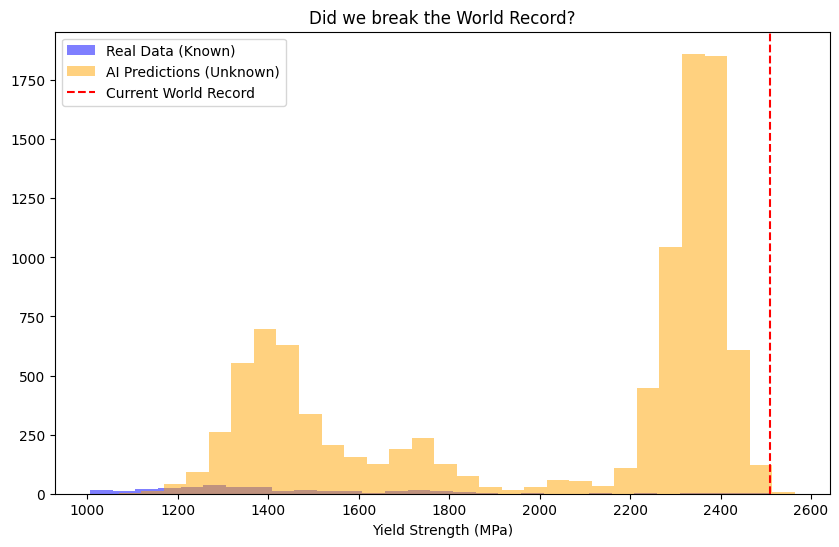

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define "Unexplored Territory"
# We allow the ingredients to go 50% higher than the maximum we've ever tested
# range_extension = 1.5 means "150% of the max value"
extended_max = X.max() * 1.5
extended_min = X.min() # Keep min at 0 (can't have negative ingredients)

# 2. Generate 10,000 "Extreme" Alloys
num_samples = 10000
extreme_alloys = pd.DataFrame(
    np.random.uniform(extended_min, extended_max, size=(num_samples, len(X.columns))),
    columns=X.columns
)

# 3. Predict using a model capable of extrapolation
# Note: Random Forest generally CANNOT predict higher than training max.
# We will use Linear Regression here just to demonstrate "Unbounded" prediction,
# OR we rely on the Random Forest finding a better COMBINATION within the bounds.
# Let's stick to our best model (likely Gradient Boosting or RF) and see if it finds a peak.
predicted_extreme = model.predict(extreme_alloys)

# 4. Find the Winner
best_idx = np.argmax(predicted_extreme)
best_alloy = extreme_alloys.iloc[best_idx]
best_strength = predicted_extreme[best_idx]

print(f"=== THE EXTREME ALLOY ===")
print(f"Max Strength in Training Data: {y.max():.2f} MPa")
print(f"Predicted Extreme Strength:    {best_strength:.2f} MPa")

if best_strength > y.max():
    print("🚀 SUCCESS: We found a theoretical material stronger than anything existing!")
else:
    print("⚠️ LIMIT REACHED: The model thinks we've already hit the physical limit of steel.")

# 5. Visualize "The Edge of Knowledge"
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.5, label='Real Data (Known)', color='blue')
plt.hist(predicted_extreme, bins=30, alpha=0.5, label='AI Predictions (Unknown)', color='orange')
plt.axvline(y.max(), color='red', linestyle='--', label='Current World Record')
plt.legend()
plt.title("Did we break the World Record?")
plt.xlabel("Yield Strength (MPa)")
plt.show()